## Подготовка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import csv
import json

with open('/content/drive/MyDrive/MasterJSON.json') as f:
    d = json.load(f)

d[151]

{'filename': 'ECGdata_s3p9v7.dat',
 'generalResult': {'hr': 50.39830921801333,
  'rmssd': 255.6627813582114,
  'sdnn': 258.2353232285019,
  'si': 3.838993630582068},
 'keywords': ['Повышенная активность парасимпатического звена',
  'Активность вазомоторного отдела. Резкие движения?',
  'Гиперактивная реакция, стресс',
  'Индекс централизации выше нормы. Наблюдается нагрузка?'],
 'spectralResult': {'hf%': 17.072861318873635,
  'ic': 4.8572490066121725,
  'lf%': 43.50984082775568,
  'ulf%': 0.0,
  'vlf%': 39.41729785337067}}

In [ ]:
f = csv.writer(open('resultCSV.csv', 'w', encoding='utf8'))

f.writerow(["Filename", "hr", "rmssd", "sdnn", "si", "hf%", "ic", "lf%", "ulf%", "vlf%"])

for x in d:
  f.writerow([x["filename"],
              x["generalResult"]["hr"],
              x["generalResult"]["rmssd"],
              x["generalResult"]["sdnn"],
              x["generalResult"]["si"],
              x["spectralResult"]["hf%"],
              x["spectralResult"]["ic"],
              x["spectralResult"]["lf%"],
              x["spectralResult"]["ulf%"],
              x["spectralResult"]["vlf%"]])

In [ ]:
import re

data = pd.read_csv('/content/resultCSV.csv')
data.is_copy = False
data['p'] = 0
data['s'] = 0
data['v'] = 0

for i in range(data.shape[0]):
  filenums = re.findall(r'\d+', data['Filename'][i])
  data['s'][i] = filenums[0]
  data['p'][i] = filenums[1]
  data['v'][i] = filenums[2]
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Filename,hr,rmssd,sdnn,si,hf%,ic,lf%,ulf%,vlf%,p,s,v
0,ECGdata_s1p10v1.dat,73.816192,700.841036,369.042870,21.701490,29.377991,2.403909,60.143947,0.0,10.478062,10,1,1
1,ECGdata_s1p10v2.dat,71.508025,759.854297,415.278343,13.900998,42.949074,1.328339,56.942716,0.0,0.108209,10,1,2
2,ECGdata_s1p10v3.dat,73.290537,715.434802,377.065180,20.479705,40.644465,1.460360,56.631635,0.0,2.723900,10,1,3
3,ECGdata_s1p10v4.dat,71.528534,727.540972,391.987827,12.487573,57.322555,0.744514,22.958890,0.0,19.718555,10,1,4
4,ECGdata_s1p10v5.dat,72.601010,763.317161,432.333271,13.500954,61.737848,0.619752,31.489775,0.0,6.772377,10,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,ECGdata_s3p9v3.dat,73.142351,298.818328,489.963131,6.392679,63.408706,0.577071,13.334497,0.0,23.256797,9,3,3
148,ECGdata_s3p9v4.dat,63.104754,279.398707,467.358310,4.510765,42.869480,1.332662,26.409697,0.0,30.720824,9,3,4
149,ECGdata_s3p9v5.dat,46.516602,221.306808,272.011694,3.537373,5.368096,17.628579,17.875630,0.0,76.756274,9,3,5
150,ECGdata_s3p9v6.dat,97.612175,295.365895,513.767934,59.839230,19.665482,4.085052,38.021943,0.0,42.312575,9,3,6


In [ ]:
data.to_csv("results.csv", sep='\t', encoding='utf-8')

NameError: ignored

## Проверка корелляции

In [4]:
data = pd.read_csv('/content/drive/MyDrive/results (1).csv', sep=';')
data = data.drop(['Filename', 'p', 's', 'v', 'Unnamed: 0', 'ulf%'], axis=1)
data

,hr,rmssd,sdnn,si,hf%,ic,lf%,vlf%,Valence,Arousal
0,73.816192,700.841036,369.042870,21.701490,29.377991,2.403909,60.143947,10.478062,7,0
1,71.508025,759.854297,415.278343,13.900998,42.949074,1.328339,56.942716,0.108209,3,4
2,73.290537,715.434802,377.065180,20.479705,40.644465,1.460360,56.631635,2.723900,5,8
3,71.528534,727.540972,391.987827,12.487573,57.322555,0.744514,22.958890,19.718555,7,4
4,72.601010,763.317161,432.333271,13.500954,61.737848,0.619752,31.489775,6.772377,2,6
...,...,...,...,...,...,...,...,...,...,...
147,73.142351,298.818328,489.963131,6.392679,63.408706,0.577071,13.334497,23.256797,4,1
148,63.104754,279.398707,467.358310,4.510765,42.869480,1.332662,26.409697,30.720824,8,1
149,46.516602,221.306808,272.011694,3.537373,5.368096,17.628579,17.875630,76.756274,3,3
150,97.612175,295.365895,513.767934,59.839230,19.665482,4.085052,38.021943,42.312575,2,2


In [5]:
data['EEG Valence'] = np.round(data['Valence'] / 5) * 5
data['EEG Arousal'] = np.round(data['Arousal'] / 5) * 5

cols = list(data.columns.values)
cols

data = data[[
              'EEG Valence',
              'EEG Arousal',
              'hr',
              'rmssd',
              'sdnn',
              'si',
              'hf%',
              'ic',
              'lf%',
              'vlf%',
              'Valence',
              'Arousal'
              ]]

data

,EEG Valence,EEG Arousal,hr,rmssd,sdnn,si,hf%,ic,lf%,vlf%,Valence,Arousal
0,5.0,0.0,73.816192,700.841036,369.042870,21.701490,29.377991,2.403909,60.143947,10.478062,7,0
1,5.0,5.0,71.508025,759.854297,415.278343,13.900998,42.949074,1.328339,56.942716,0.108209,3,4
2,5.0,10.0,73.290537,715.434802,377.065180,20.479705,40.644465,1.460360,56.631635,2.723900,5,8
3,5.0,5.0,71.528534,727.540972,391.987827,12.487573,57.322555,0.744514,22.958890,19.718555,7,4
4,0.0,5.0,72.601010,763.317161,432.333271,13.500954,61.737848,0.619752,31.489775,6.772377,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
147,5.0,0.0,73.142351,298.818328,489.963131,6.392679,63.408706,0.577071,13.334497,23.256797,4,1
148,10.0,0.0,63.104754,279.398707,467.358310,4.510765,42.869480,1.332662,26.409697,30.720824,8,1
149,5.0,5.0,46.516602,221.306808,272.011694,3.537373,5.368096,17.628579,17.875630,76.756274,3,3
150,0.0,0.0,97.612175,295.365895,513.767934,59.839230,19.665482,4.085052,38.021943,42.312575,2,2


In [6]:
y1 = data['Valence'].copy()
y2 = data['Arousal'].copy()
data1 = data.drop(['Valence', 'Arousal'], axis=1)
metrics = data1.columns.to_list()
metrics

['EEG Valence',
 'EEG Arousal',
 'hr',
 'rmssd',
 'sdnn',
 'si',
 'hf%',
 'ic',
 'lf%',
 'vlf%']

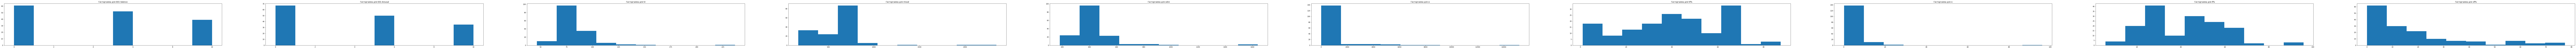

In [ ]:
fig, ax = plt.subplots(1, len(metrics), figsize=(300, 5))
for i in range(len(metrics)):
    ax[i].set_title(f'Гисторгамма для {metrics[i]}')
    ax[i].hist(data1[metrics[i]])
plt.show()

In [7]:
import seaborn as sns

corr_digit = data1[metrics].corr()
corr_digit

,EEG Valence,EEG Arousal,hr,rmssd,sdnn,si,hf%,ic,lf%,vlf%
EEG Valence,1.000000,-0.391847,-0.063719,0.057403,0.061248,-0.030416,-0.107120,0.102988,0.109802,0.014844
EEG Arousal,-0.391847,1.000000,-0.108405,-0.029310,-0.052335,-0.044518,0.078391,-0.079912,-0.133731,0.036719
hr,-0.063719,-0.108405,1.000000,-0.116988,0.121498,0.659221,-0.238923,0.170210,0.241198,0.036412
rmssd,0.057403,-0.029310,-0.116988,1.000000,0.622622,-0.042373,0.200332,0.263905,0.036532,-0.243376
sdnn,0.061248,-0.052335,0.121498,0.622622,1.000000,0.349555,-0.240662,0.556202,0.127278,0.139792
si,-0.030416,-0.044518,0.659221,-0.042373,0.349555,1.000000,-0.199077,0.177830,0.120010,0.102510
hf%,-0.107120,0.078391,-0.238923,0.200332,-0.240662,-0.199077,1.000000,-0.520752,-0.480773,-0.623734
ic,0.102988,-0.079912,0.170210,0.263905,0.556202,0.177830,-0.520752,1.000000,0.158654,0.406562
lf%,0.109802,-0.133731,0.241198,0.036532,0.127278,0.120010,-0.480773,0.158654,1.000000,-0.385500
vlf%,0.014844,0.036719,0.036412,-0.243376,0.139792,0.102510,-0.623734,0.406562,-0.385500,1.000000


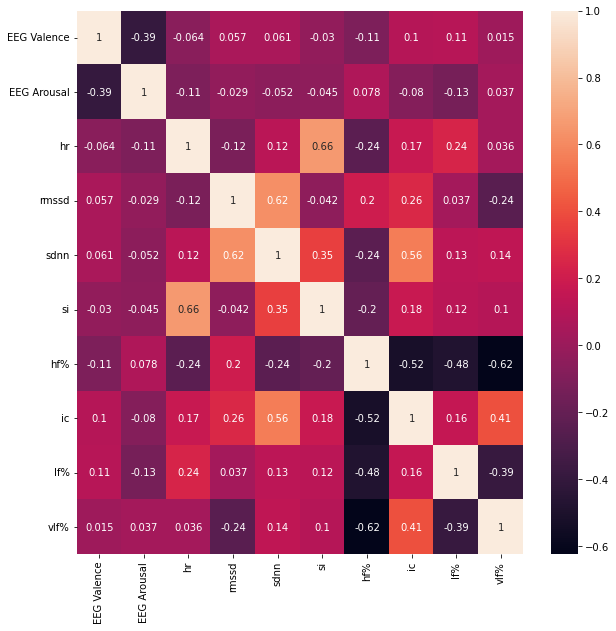

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_digit, annot=True)
plt.show()

## Регрессия на sklearn (нигде не используется, просто красивое)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = data_val
y = y1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg_val = LinearRegression().fit(x_train, y_train)
print(reg_val.coef_, reg_val.intercept_)

y_pred = reg_val.predict(x_test)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse: %.3f, mae: %.3f' % (mse, mae))

[ 8.33211540e-01 -3.70837279e-02  9.51405546e-04 -1.80335068e-03
 -3.66308001e-05 -2.43060998e-03  6.69202941e-03] 1.1417133072756176
mse: 12537698.432, mae: 1291.077


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg_aro = LinearRegression().fit(x_train, y_train)
print(reg_aro.coef_, reg_aro.intercept_)

y_pred = reg_aro.predict(x_test)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse: %.3f, mae: %.3f' % (mse, mae))

[ 8.38195272e-01 -4.22965381e-02 -1.77996234e-04 -7.38450376e-04
 -3.04749456e-05  5.29680083e-03  5.41619999e-03] 1.0639253639242217
mse: 14935169.703, mae: 1688.214


## Делаем линейную регрессию (Валентность)

In [10]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
data_val = data1[['EEG Valence', 'EEG Arousal', 'rmssd', 'sdnn', 'si', 'hf%', 'vlf%']]

In [17]:
X_val = data_val
#X_val = MinMaxScaler().fit(X_val).transform(X_val)
y_val = np.array(y1).reshape(-1, 1)
X2_val = np.array(X_val)
model_val = sm.OLS(y_val, X2_val).fit()
predictions = model_val.predict(X2_val) 

print(model_val.summary())
print(model_val.params
      )

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              546.7
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                   7.73e-101
Time:                        08:23:31   Log-Likelihood:                         -226.82
No. Observations:                 152   AIC:                                      467.6
Df Residuals:                     145   BIC:                                      488.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(model_val.mse_resid, model_val.mse_total)
print(model_val.mse_model)

1.207413502528012 31.717105263157894
663.7035774476341


## Делаем линейную регрессию 2 (Активация)

In [18]:
data_aro = data1[['EEG Valence', 'EEG Arousal', 'hr', 'sdnn', 'si']]

In [22]:
X_aro = data_aro
#X_aro = MinMaxScaler().fit(X_aro).transform(X_aro)
y_aro = np.array(y2).reshape(-1, 1)

X2_aro = np.array(X_aro)
model_aro = sm.OLS(y_aro, X2_aro).fit()
predictions2 = model_aro.predict(X2_aro) 

print(model_aro.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              691.1
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                   3.51e-100
Time:                        09:16:11   Log-Likelihood:                         -216.65
No. Observations:                 152   AIC:                                      443.3
Df Residuals:                     147   BIC:                                      458.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(model_aro.mse_resid, model_aro.mse_total)
print(model_aro.mse_model)

1.0737576843233823 24.82236842105263
723.0315240808925


## Считаем метрику неуменьшения точности

In [20]:
def dir_metric(eeg, pred, target) -> int:
  target_dif = target - eeg
  pred_dif = pred - eeg

  if (target_dif == 0):
    return 1 if pred_dif == 0 else 0
  elif (target_dif > 0):
    return 1 if (pred_dif > 0 and pred_dif <= target_dif) else 0
  else:
    return 1 if (pred_dif < 0 and pred_dif >= target_dif) else 0

def dir_metric2(eeg, pred, target) -> int:
  target_dif = target - eeg
  pred_dif = pred - eeg

  if (target_dif == 0):
    return 1 if pred_dif == 0 else 0
  elif (target_dif > 0):
    return 1 if (pred_dif >= 0 and pred_dif <= target_dif) else 0
  else:
    return 1 if (pred_dif <= 0 and pred_dif >= target_dif) else 0


In [21]:
result = pd.DataFrame(index=range(len(predictions)), columns=['EEG Valence', 'EEG Arousal', 'Pred Valence', 'Pred Arousal', 'Target Valence', 'Target Arousal', 'Dir Valence', 'Dir Arousal', 'Dir2 Valence', 'Dir2 Arousal'])

for i in range(len(predictions)):
  result['EEG Valence'][i] = data1['EEG Valence'][i]
  result['EEG Arousal'][i] = data1['EEG Arousal'][i]

  result['Pred Valence'][i] = np.round(predictions[i])
  result['Pred Arousal'][i] = np.round(predictions2[i])
                                    
  result['Target Valence'][i] = y1[i]
  result['Target Arousal'][i] = y2[i]

  result['Dir Valence'][i] = dir_metric(data1['EEG Valence'][i], np.round(predictions[i]), y1[i])
  result['Dir Arousal'][i] = dir_metric(data1['EEG Arousal'][i], np.round(predictions2[i]), y2[i])

  result['Dir2 Valence'][i] = dir_metric2(data1['EEG Valence'][i], np.round(predictions[i]), y1[i])
  result['Dir2 Arousal'][i] = dir_metric2(data1['EEG Arousal'][i], np.round(predictions2[i]), y2[i])

print('Valence  ', '{:.3f}'.format(result['Dir Valence'].mean()), '{:.3f}'.format(result['Dir2 Valence'].mean()))
print('Arousal  ', '{:.3f}'.format(result['Dir Arousal'].mean()), '{:.3f}'.format(result['Dir2 Arousal'].mean()))

Valence   0.434 0.743
Arousal   0.605 0.862
